### Supervised Learning
- Liner Methods (simple, intepretable)
    - Linear Regression [Regression]
    - Logistic Regression [Classification]
- Ensemble Methods (improve accuracy, reduce overfitting)
    - Random Forest Regressor [Regression]
    - Gradient Boosting Classifier [Classification]
- Kernel-Based Methods (high-dimensional boundaries)
    - Support Vector Regressor [Regression]
    - Linear Support Vector Classifier [Classification]
- Tree-based (Handle Nonlinearities, Interactions) --> Decision Tree, Gradient Boosting Classifier
- Instance-based (memory-based, distance-driven) --> K-Nearest Neighbors
- Probabilistic Methods (based on likelihoods) --> Bayesian regression, Naive Bayes
- Neural Network & Deep Learnig (complex, flexible, data-hungry) --> MLP regressor, Deep Nets, CNN, RNN
- Overfitting & Underfitting

In [1]:
# import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Regression Dataset
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
X_reg, y_reg = housing.data, housing.target

regression_df = pd.DataFrame(X_reg, columns=housing.feature_names)
regression_df['HousePrice'] = y_reg
regression_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Classification Dataset
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer = load_breast_cancer()
X_cls, y_cls = cancer.data, cancer.target

classification_df = pd.DataFrame(X_cls, columns=cancer.feature_names)
classification_df['Target'] = y_cls
classification_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Linear Methods
When to Use:
- You need interpretability and speed.
- Relationships are approximately linear.
- Dataset is small or medium-sized.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Simple & interpretable → coefficients show direct feature influence.</td>
    <td>Linearity assumption → fails if relationships are nonlinear or complex.</td>
  </tr>
    <tr>
    <td>Computationally efficient → fast to train even on large datasets.</td>
    <td>Sensitive to multicollinearity & outliers → can distort coefficients.</td>
  </tr>
  </tr>
    <tr>
    <td>Low data requirement → works well with smaller datasets.</td>
    <td>Limited flexibility → cannot easily model feature interactions unless engineered.</td>
  </tr>
  </tr>
    <tr>
    <td>Regularization available (Ridge/Lasso/Elastic Net) → helps control overfitting and perform feature selection.</td>
    <td>Not always the most accurate → often outperformed by ensembles or deep learning on complex data.</td>
  </tr>
</table>

### Linear Regression
- Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features by fitting a linear relationship.
- Linear Regression is a baseline, interpretable model for regression tasks. 
- Works best when relationships are approximately linear, and results are easy to explain to stakeholders.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split dataset
# X_reg → Features (your input data).
# y_reg → Target (your output data).
# test_size=0.2 → 20% of the data goes into the test set, 80% into the training set.
# random_state=42 → Ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Print first 10 test samples with actual and predicted values
df_results = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})

# Print the DataFrame
print(df_results)

Mean Absolute Error: 0.5332001304956989
    Actual  Predicted     Error
0  0.47700   0.719123  0.242123
1  0.45800   1.764017  1.306017
2  5.00001   2.709659  2.290351
3  2.18600   2.838926  0.652926
4  2.78000   2.604657  0.175343
5  1.58700   2.011754  0.424754
6  1.98200   2.645500  0.663500
7  1.57500   2.168755  0.593755
8  3.40000   2.740746  0.659254
9  4.46600   3.915615  0.550385


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- MAE is useful because it is in the same unit as the target variable (house prices in this case).
- Lower MAE → better predictions.
- From the first 10 samples, most predictions are reasonably close, but there are some larger deviations for higher-priced houses (common in regression models).
- You can also combine MAE with RMSE to understand how much extreme errors affect the model.

The model achieved a Mean Absolute Error (MAE) of 0.533, meaning the average prediction error is about $53,300 (in $100,000 units). Inspection of the first 10 test samples shows most predictions are close to actual prices, though some higher-priced houses have larger errors. Overall, the model provides reasonably accurate predictions with a few outliers affecting extreme cases.

### Logistic Regression
- Logistic Regression is a supervised learning algorithm used for binary or multi-class classification. It models the probability of a class using the logistic (sigmoid) function.
- Logistic Regression is a baseline classification model that is interpretable, simple, and effective for binary classification problems.
- Works best when the relationship between features and the target is approximately linear.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-test split
# stratify → The split preserves the same proportion of classes in both train and test sets.
# If the full dataset has 90% A / 10% B, then both training and test sets will maintain 
# roughly 90% A / 10% B.
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, 
                                                    random_state=42, stratify=y_cls)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Show first 10 predictions vs actual
results_df = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10]
})
print("\nFirst 10 Samples:\n", results_df)


Accuracy: 0.9473684210526315

First 10 Samples:
    Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          0
4       0          0
5       1          1
6       1          1
7       0          0
8       0          0
9       0          0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- The model performs very well overall with ~95% accuracy.
- Most predictions are correct, as seen in the first 10 samples.

<u>Limitations</u> 
- Accuracy does not tell you which class is being misclassified (malignant vs benign).
    - Example: Index 3 shows a benign sample was misclassified as malignant or vice versa depending on your labeling.

The model achieved 94.7% overall accuracy, correctly predicting most test samples. The first 10 samples confirm that only one sample was misclassified, indicating strong general performance, but class-specific metrics should be reviewed to ensure sensitive cases (malignant tumors) are not missed.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Ensemble Methods
- Ensemble methods combine multiple models (often weak learners like decision trees) to produce a stronger, more accurate model..
- Bagging (e.g., Random Forest) → trains many models on random subsets of the data and averages their predictions. This reduces variance and makes results more stable.
- Boosting (e.g., XGBoost, LightGBM, AdaBoost) → builds models one after another, with each new model fixing the mistakes of the previous ones. This reduces bias and improves accuracy.
- Stacking / Voting → combines predictions from different models.
    - Voting: takes majority vote (classification) or average (regression).
    - Stacking: trains another model (meta-learner) to best combine the outputs.

When to use:
  - Accuracy is more important than interpretability.
  - Problem has nonlinear relationships or complex feature interactions.
  - You have sufficient data and compute power.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>High accuracy → often outperform single models.</td>
    <td>Less interpretable → hard to explain decisions compared to simple models.</td>
  </tr>
    <tr>
    <td>Handles nonlinearity & feature interactions well.</td>
    <td>Computationally expensive → training and prediction can be slow on large datasets.</td>
  </tr>
  </tr>
    <tr>
    <td>Robustness → less prone to overfitting than individual trees.</td>
    <td>Hyperparameter tuning is critical and can be complex.</td>
  </tr>
</table>

### Random Forest Regressor
- Random Forest Regressor is an ensemble learning method for regression that combines multiple decision trees to predict a continuous target variable.
- Each tree is trained on a random subset of the data and features, and the final prediction is the average of all tree predictions.
- Random Forest Regressor is a powerful, flexible model for regression tasks.
- Capable of capturing complex patterns and non-linear relationships while remaining robust to overfitting.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# Train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Show first 10 predictions vs actual values
results_df = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})
print("\nFirst 10 Predictions:\n", results_df)

RMSE: 0.51

First 10 Predictions:
     Actual  Predicted     Error
0  0.47700   0.496530  0.019530
1  0.45800   0.753350  0.295350
2  5.00001   4.904067  0.095943
3  2.18600   2.561870  0.375870
4  2.78000   2.356810  0.423190
5  1.58700   1.622130  0.035130
6  1.98200   2.360620  0.378620
7  1.57500   1.677610  0.102610
8  3.40000   2.791260  0.608740
9  4.46600   4.907809  0.441809


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- Low RMSE (~0.51) indicates the model’s predictions are quite accurate overall.
- RMSE is slightly lower than MAE in terms of scale, suggesting errors are generally small and not dominated by extreme outliers.
- For regression tasks like house price prediction, both RMSE and MAE together give a good sense of performance:
- MAE shows average absolute error.
- RMSE shows penalized larger errors, emphasizing extreme deviations.

The model achieved a Root Mean Squared Error (RMSE) of 0.51, meaning the average deviation between predicted and actual house prices is around $51,000 (in $100,000 units), with larger deviations slightly penalized.

### Gradient Boosting Classifier
- Gradient Boosting Classifier is an ensemble learning method for classification that builds models sequentially, where each new tree corrects the errors of the previous trees.
- The final prediction is a weighted sum of all trees, optimized using gradient descent on a loss function.
- Gradient Boosting Classifier is a powerful, sequential ensemble model that excels at capturing complex patterns in classification tasks.
- It has high ability to handle non-linear relationships.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion matrix (malignant=positive class → pos_label=0)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
tp, fn, fp, tn = conf_matrix.ravel()  # re-map to match malignant as positive

# Descriptive matrix
conf_df = pd.DataFrame(
    [[tp, fn], [fp, tn]],
    index=["Actual Malignant", "Actual Benign"],
    columns=["Predicted Malignant", "Predicted Benign"]
)

print("\nConfusion Matrix\n\n", conf_df)

print(f"\nTrue Positives (TP - malignant correctly predicted): {tp}")
print(f"False Negatives (FN - malignant predicted as benign): {fn}")
print(f"False Positives (FP - benign predicted as malignant): {fp}")
print(f"True Negatives (TN - benign correctly predicted): {tn}")

# Precision, Recall, F1 for malignant class (pos_label=0)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)

print(f"\nPrecision (Malignant): {precision:.2f}")
print(f"Recall/Sensitivity (Malignant): {recall:.2f}")

# Heatmap with TP, FN, FP, TN annotations
labels = [
    [f"TP = {tp}", f"FN = {fn}"],
    [f"FP = {fp}", f"TN = {tn}"]
]



Confusion Matrix

                   Predicted Malignant  Predicted Benign
Actual Malignant                   38                 4
Actual Benign                       1                71

True Positives (TP - malignant correctly predicted): 38
False Negatives (FN - malignant predicted as benign): 4
False Positives (FP - benign predicted as malignant): 1
True Negatives (TN - benign correctly predicted): 71

Precision (Malignant): 0.97
Recall/Sensitivity (Malignant): 0.90


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>What Each Value Means</u>
- <i>True Positives (TP = 38)</i> → Malignant tumors correctly identified as malignant.
- <i>False Negatives (FN = 4)</i> → Malignant tumors incorrectly classified as benign (missed cases).
- <i>False Positives (FP = 1)</i> → Benign tumors incorrectly classified as malignant (false alarms).
- <i>True Negatives (TN = 71)</i> → Benign tumors correctly identified as benign.

<u>Metrics for Malignant</u>
- <i>Precision = 0.9</i> → When the model predicts malignant, it’s correct 97% of the time. Very few benign cases are misclassified as malignant (only 1 FP).
- <i>Recall / Sensitivity = 0.90</i> → The model detects 90% of all malignant tumors. But it misses 10% (4 out of 42 malignant cases), which could be risky in a medical setting.

<u>Practical Interpretation</u>
- The model is very precise: almost every malignant prediction is correct (few false alarms).
- However, recall is slightly lower (90%), meaning a few malignant cases are missed.
- In healthcare, recall (sensitivity) for malignant detection is critical, because missing malignant tumors is more dangerous than raising false alarms.
- A potential strategy: adjust the decision threshold to improve recall (catch more malignant cases), even if precision drops slightly.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Kernel-Based Methods
- Kernel methods project data into higher-dimensional feature spaces where linear separation or fitting becomes possible.
- The most common example is Support Vector Machines (SVM) for classification and Support Vector Regression (SVR) for regression.
- Kernels (e.g., linear, polynomial, radial basis function/RBF) define how similarity between data points is computed.

When to use:
  - Data is complex and nonlinear.
  - The dataset is small to medium-sized but high-dimensional.
  - Interpretability is less important than capturing complex relationships.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Powerful for nonlinear problems → kernel trick allows flexible decision boundaries.</td>
    <td>Computationally heavy → scales poorly with very large datasets.</td>
  </tr>
    <tr>
    <td>Effective in high dimensions (e.g., text, genomics).</td>
    <td>Requires tuning → kernel choice and parameters (C, gamma, epsilon) can be tricky.</td>
  </tr>
  </tr>
    <tr>
    <td>Robust to overfitting with proper regularization.</td>
    <td>Less interpretable → decision boundaries are not as transparent as linear or tree-based models.</td>
  </tr>
</table>

#### Support Vector Regressor
- Support Vector Regressor is a supervised learning algorithm that predicts a continuous target variable by finding a function that deviates from the actual target.
- SVR is a flexible regression model capable of handling both linear and non-linear relationships.
- It is particularly useful for complex, high-dimensional datasets, though it requires careful preprocessing and parameter tuning.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Train SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled)

# Predictions (inverse transform to original scale)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")

# Show first 10 test predictions
results_df = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})
print("\nFirst 10 Predictions:")
print(results_df)

R² Score: 0.73

First 10 Predictions:
    Actual  Predicted     Error
0  0.47700   0.516596  0.039596
1  0.45800   1.555282  1.097282
2  5.00001   3.639638  1.360372
3  2.18600   2.490630  0.304630
4  2.78000   2.581783  0.198217
5  1.58700   1.677584  0.090584
6  1.98200   2.626898  0.644898
7  1.57500   1.728762  0.153762
8  3.40000   2.319093  1.080907
9  4.46600   4.720254  0.254254


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- R² = 0.73 indicates a good but not perfect model.
- The model captures most of the trend in the data but struggles with extreme or high-value houses, which is common in regression.
- R² complements MAE and RMSE:
- MAE/RMSE quantify average prediction errors.
- R² tells you how well the model explains the variability in the dataset.
- A higher R² (closer to 1) would indicate more predictive power, while lower R² (<0.5) would indicate a weak fit.

The regression model achieved an R² score of 0.73, meaning it explains 73% of the variance in house prices. Inspection of the first 10 predictions shows most low- to mid-priced houses are predicted accurately, while higher-priced houses have slightly larger errors, which is typical in real-world datasets.

#### Linear Support Vector Classifier
- LinearSVC is a supervised learning algorithm for binary or multiclass classification. 
- It finds a linear hyperplane that best separates classes by maximizing the margin between them.
- It is a fast and efficient classifier for linearly separable data and high-dimensional feature spaces.

In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVC
svc = LinearSVC(random_state=42, max_iter=10000)
svc.fit(X_train_scaled, y_train)

# Predictions
y_pred = svc.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))



Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Breakdown of Results</u>
- Malignant
    - <i>Support = 42</i> means there were 42 actual malignant cases in the test set.
    - <i>Precision = 0.95</i> → Out of all cases predicted as malignant, 95% were truly malignant.
    - <i>Recall = 0.95</i> → Out of the 42 actual malignant cases, 95% were detected (2 were missed).
    - <i>F1-score = 0.95</i> → Harmonic mean of precision & recall, showing strong overall performance on malignant detection.
- Benign
    - <i>Support = 72</i> means there were 72 actual benign cases.
    - <i>Precision = 0.97</i> → When the model predicts benign, it’s correct 97% of the time.
    - <i>Recall = 0.97</i> → The model correctly identifies 97% of benign cases (very few misclassified).
    - <i>F1-score = 0.97</i> → Excellent balance between precision and recall.

<u>Overall Model Performance</u>
- Accuracy = 0.96 (96%) → Out of all 114 test cases, the model predicted 96% correctly.
- Macro avg = 0.96 → The average performance across both classes is balanced, showing no major bias toward malignant or benign.
- Weighted avg = 0.96 → Average weighted by support (number of samples per class). Since benign (72) has more samples than malignant (42), benign’s performance has more influence on the   weighted average.That’s why weighted avg ≈ accuracy in imbalanced datasets.

<u>How to interpret in context</u>
- The model is highly reliable for both malignant and benign classification.
- For medical use, recall for malignant is especially important (missing a malignant tumor is more dangerous than misclassifying a benign one).
- Here, recall for malignant is 95%, which is strong — but in real-world medical applications, you may want to push this even closer to 100% (even if precision drops a bit).

------------------------------------------------------------------------------------------------
### Overfitting & Underfitting

<u>Overfitting</u>
- Occurs when a model learns not only the underlying patterns but also the noise in the training data.
- The model performs very well on training data but poorly on unseen/test data.
- Example: A high-degree polynomial perfectly fits all training points but fails to generalize.

<u>Underfitting</u>
- Occurs when a model is too simple to capture the underlying patterns in the data.
- The model performs poorly on both training and test data.
- Example: A linear model trying to fit a highly non-linear relationship.

<u>Causes</u>
- Overfitting: Too complex model, too many features, or too few training samples.
- Underfitting: Model too simple, insufficient features, or over-regularization.

<u>Detection</u>
- Compare training vs validation/test performance
- High training accuracy but low validation accuracy → Overfitting.
- Low training accuracy and low validation accuracy → Underfitting.

<u>Solutions</u>
- Overfitting: Reduce model complexity, use regularization, get more training data, or use ensemble methods.
- Underfitting: Increase model complexity, add relevant features, reduce regularization, or use more flexible algorithms.

Summary:
Overfitting and underfitting are key challenges in model building. Balancing them is essential for generalizable models that perform well on unseen data. Techniques like cross-validation, regularization, and feature engineering help achieve this balance.

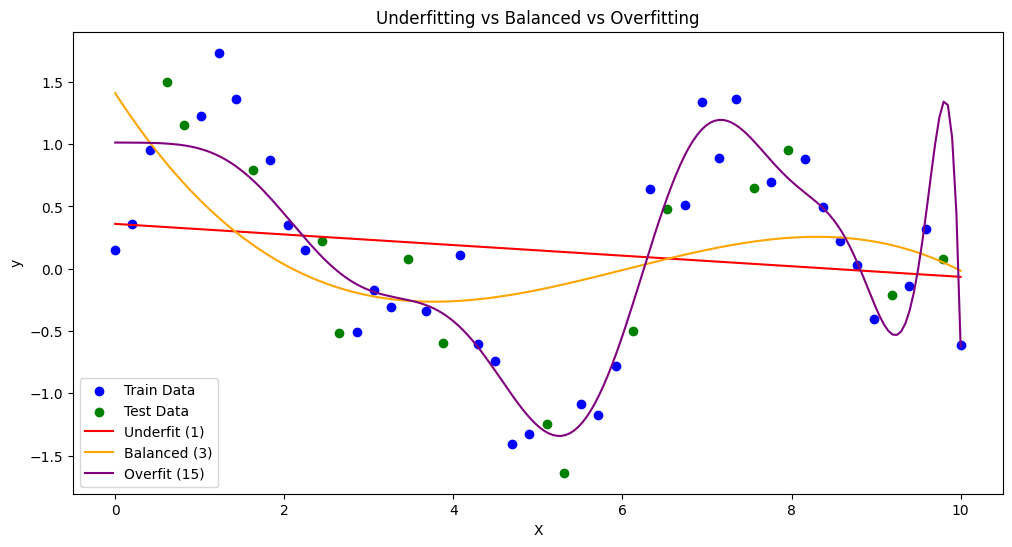

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate more spread synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)                # more points
y = np.sin(X) + np.sin(2*X)/2 + np.random.normal(scale=0.3, size=X.shape)  # more variation

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate polynomial regression
def poly_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #print(f"Instance {degree} -> Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    return y_train_pred, y_test_pred

# Underfitting example (degree=1)
y_train_pred1, y_test_pred1 = poly_regression(degree=1)

# Balanced model (degree=3)
y_train_pred3, y_test_pred3 = poly_regression(degree=3)

# Overfitting example (degree=15)
y_train_pred15, y_test_pred15 = poly_regression(degree=15)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

X_plot = np.linspace(0, 10, 200).reshape(-1, 1)  # more smooth curve
for degree, color, label in zip([1,3,15], ['red','orange','purple'], ['Underfit (1)','Balanced (3)','Overfit (15)']):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    plt.plot(X_plot, model.predict(X_plot), color=color, label=label)

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Underfitting vs Balanced vs Overfitting")
plt.show()
